In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

        ID_CIDERH REGION   FECHA_RBE  TEMP_MAX_RBE    LAT_Y    LON_X
0      M_001_B_II     II  1994-06-01          22.4 -22.4953 -69.9044
1      M_001_B_II     II  1994-06-02          24.8 -22.4953 -69.9044
2      M_001_B_II     II  1994-06-03          26.8 -22.4953 -69.9044
3      M_001_B_II     II  1994-06-04          23.4 -22.4953 -69.9044
4      M_001_B_II     II  1994-06-05          23.2 -22.4953 -69.9044
...           ...    ...         ...           ...      ...      ...
90448    M_225_AA     II  2009-04-08          21.9 -23.4330 -70.4500
90449    M_225_AA     II  2009-05-02          20.3 -23.4330 -70.4500
90450    M_225_AA     II  2009-08-15          17.1 -23.4330 -70.4500
90451    M_225_AA     II  2009-10-12          17.0 -23.4330 -70.4500
90452    M_221_AA     II  1994-06-27          29.1 -22.5000 -68.9000

[90453 rows x 6 columns]


In [2]:
df_original = pd.read_csv('MatrizTMII.csv')

df_nuevo = pd.DataFrame()

for estacion in df_original['ID_CIDERH'].unique():
    df_estacion = df_original[df_original['ID_CIDERH'] == estacion]
    
    df_nuevo[estacion] = df_estacion['TEMP_MAX_RBE'].reset_index(drop=True)

df_nuevo.to_csv('VMTMII.csv', index=False)

archivo_csv2 = "VMTMII.csv"
datos2 = pd.read_csv(archivo_csv2)

print(datos2)

      M_001_B_II  M_002_B_II  M_006_A_II  M_009_A_II  M_015_A_II  M_017_A_II  \
0           22.4        24.6        14.8        18.0        20.4        23.5   
1           24.8        23.3        15.4        19.3        25.5        23.9   
2           26.8        21.3        13.6        17.9        23.1        23.0   
3           23.4        18.4        13.5        16.5        23.5        24.9   
4           23.2        15.6        17.8        18.1        23.2        23.5   
...          ...         ...         ...         ...         ...         ...   
6196        20.0        21.8         NaN         NaN         NaN         NaN   
6197        20.6        21.2         NaN         NaN         NaN         NaN   
6198        22.3        22.0         NaN         NaN         NaN         NaN   
6199        20.0        21.1         NaN         NaN         NaN         NaN   
6200        22.3        21.6         NaN         NaN         NaN         NaN   

      M_021_A_II  M_022_A_II  M_023_A_I

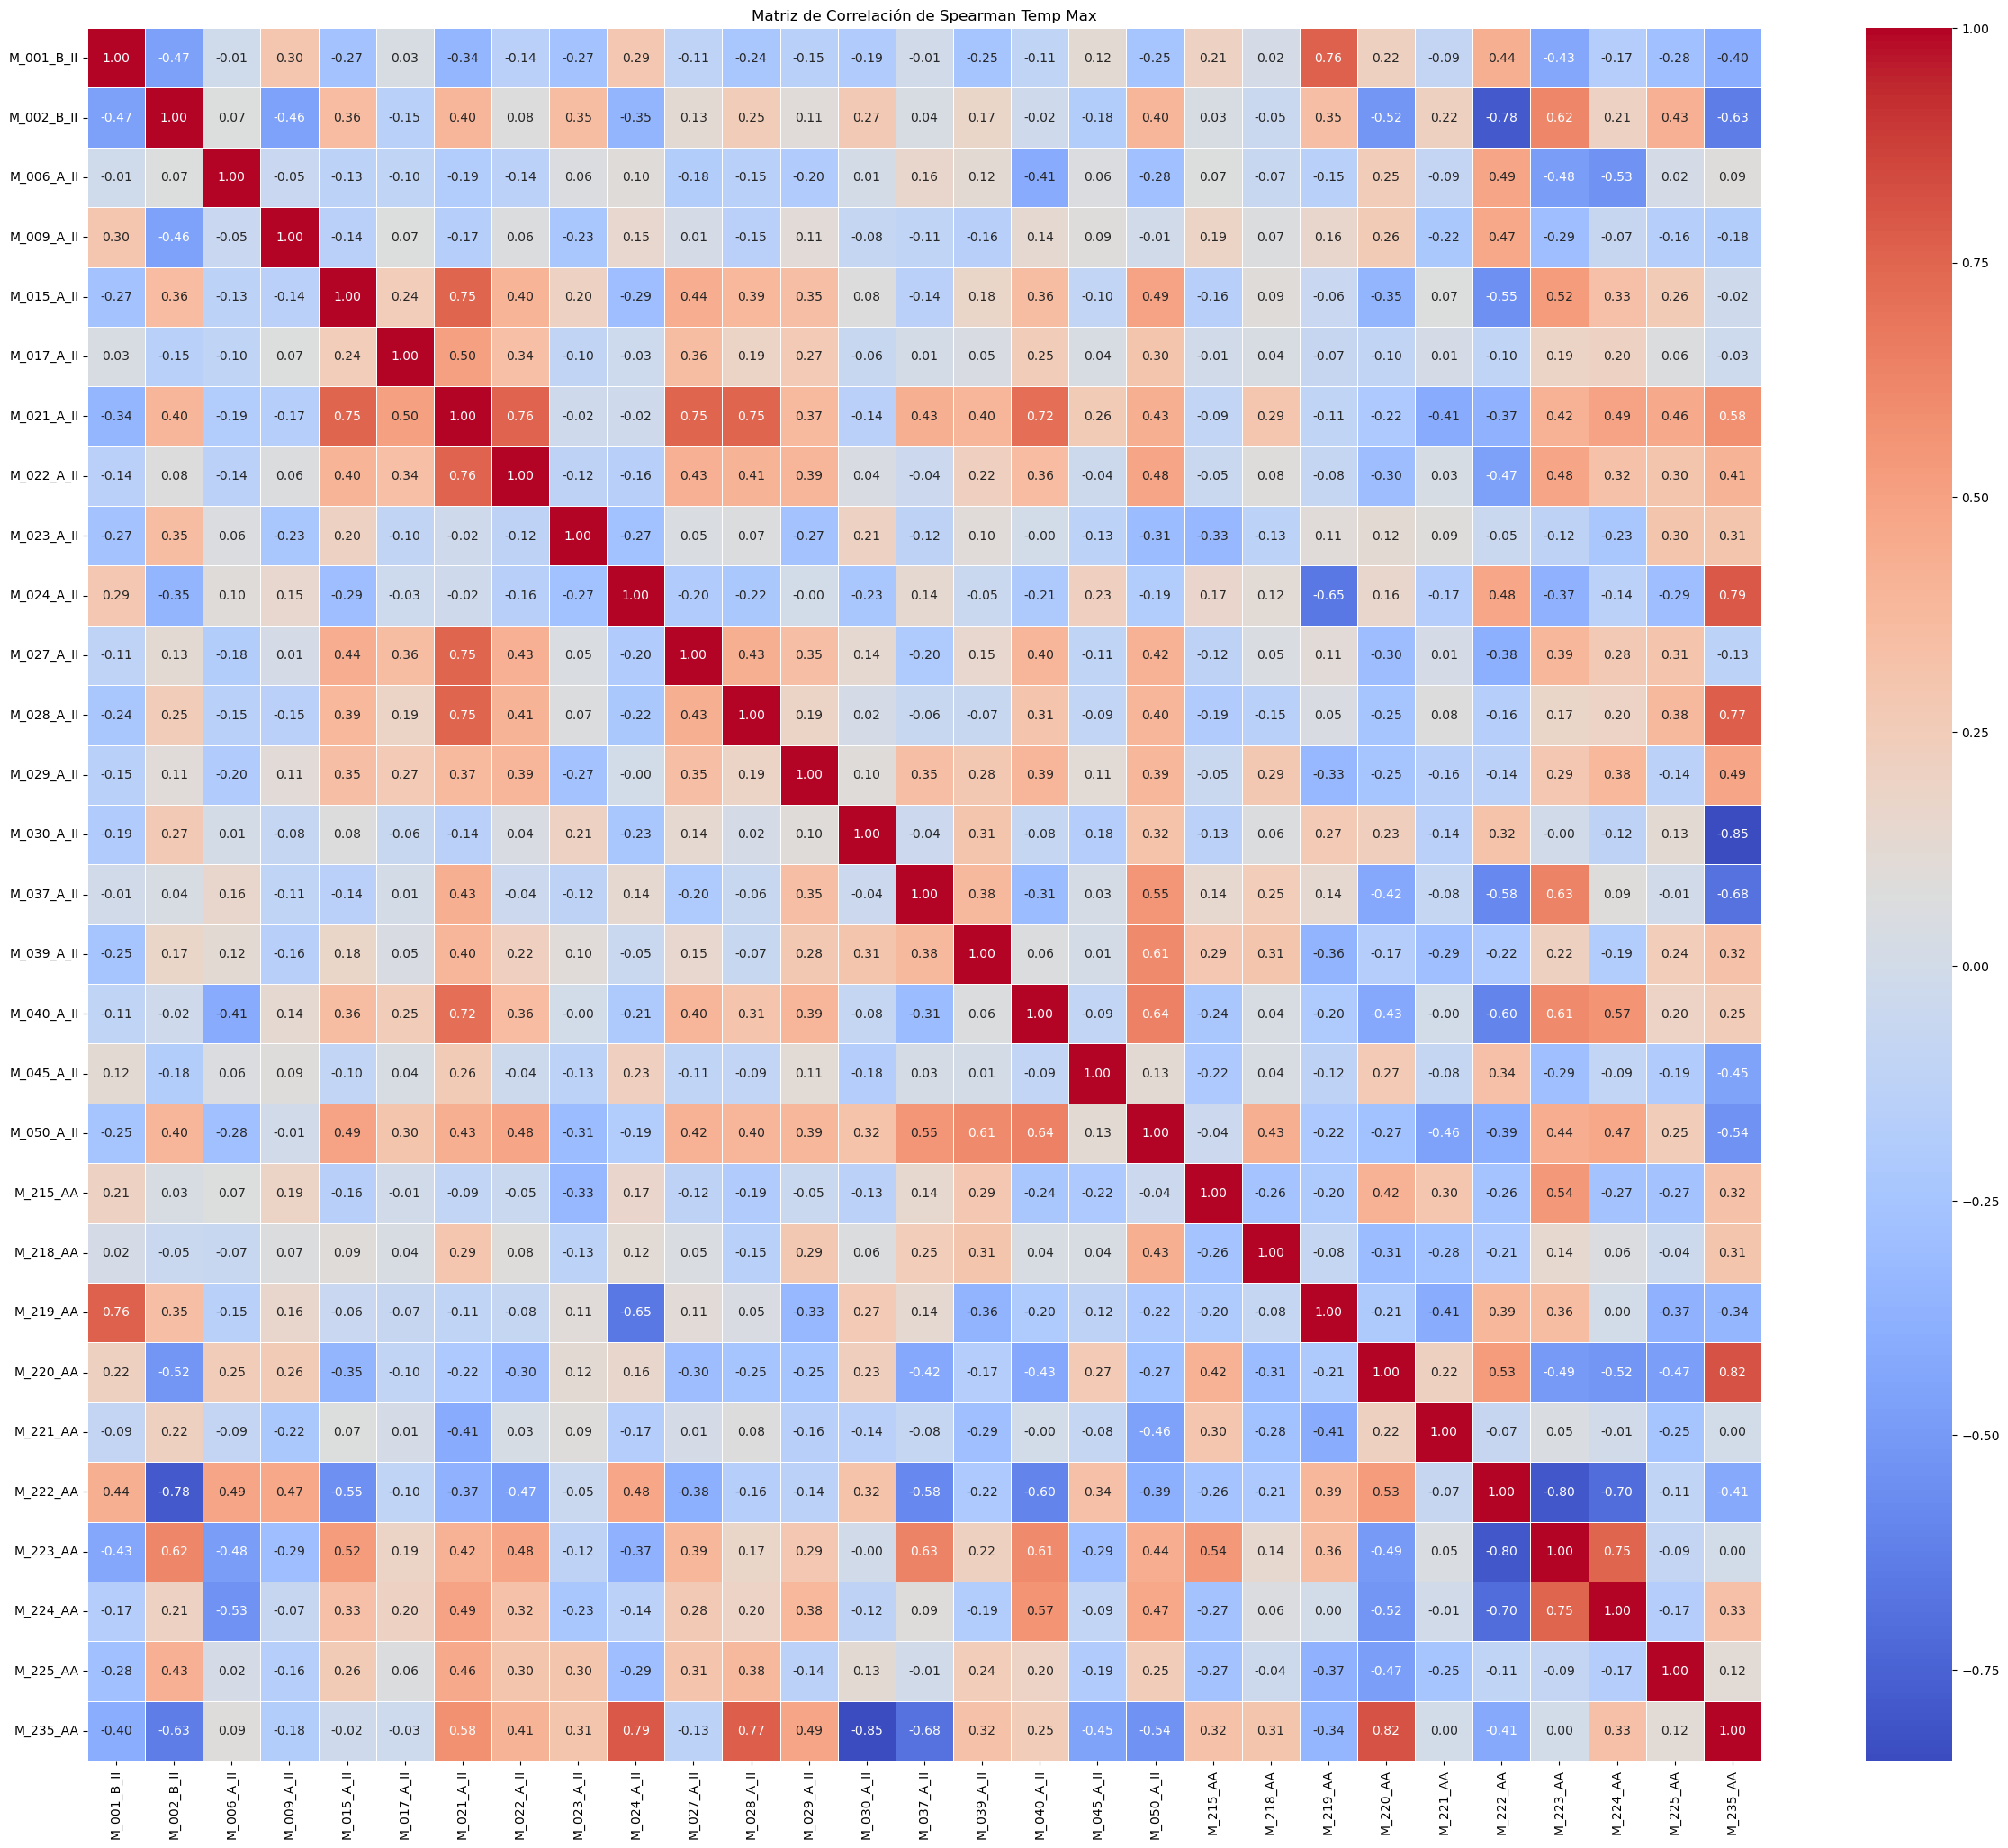

In [3]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Max")
plt.show()

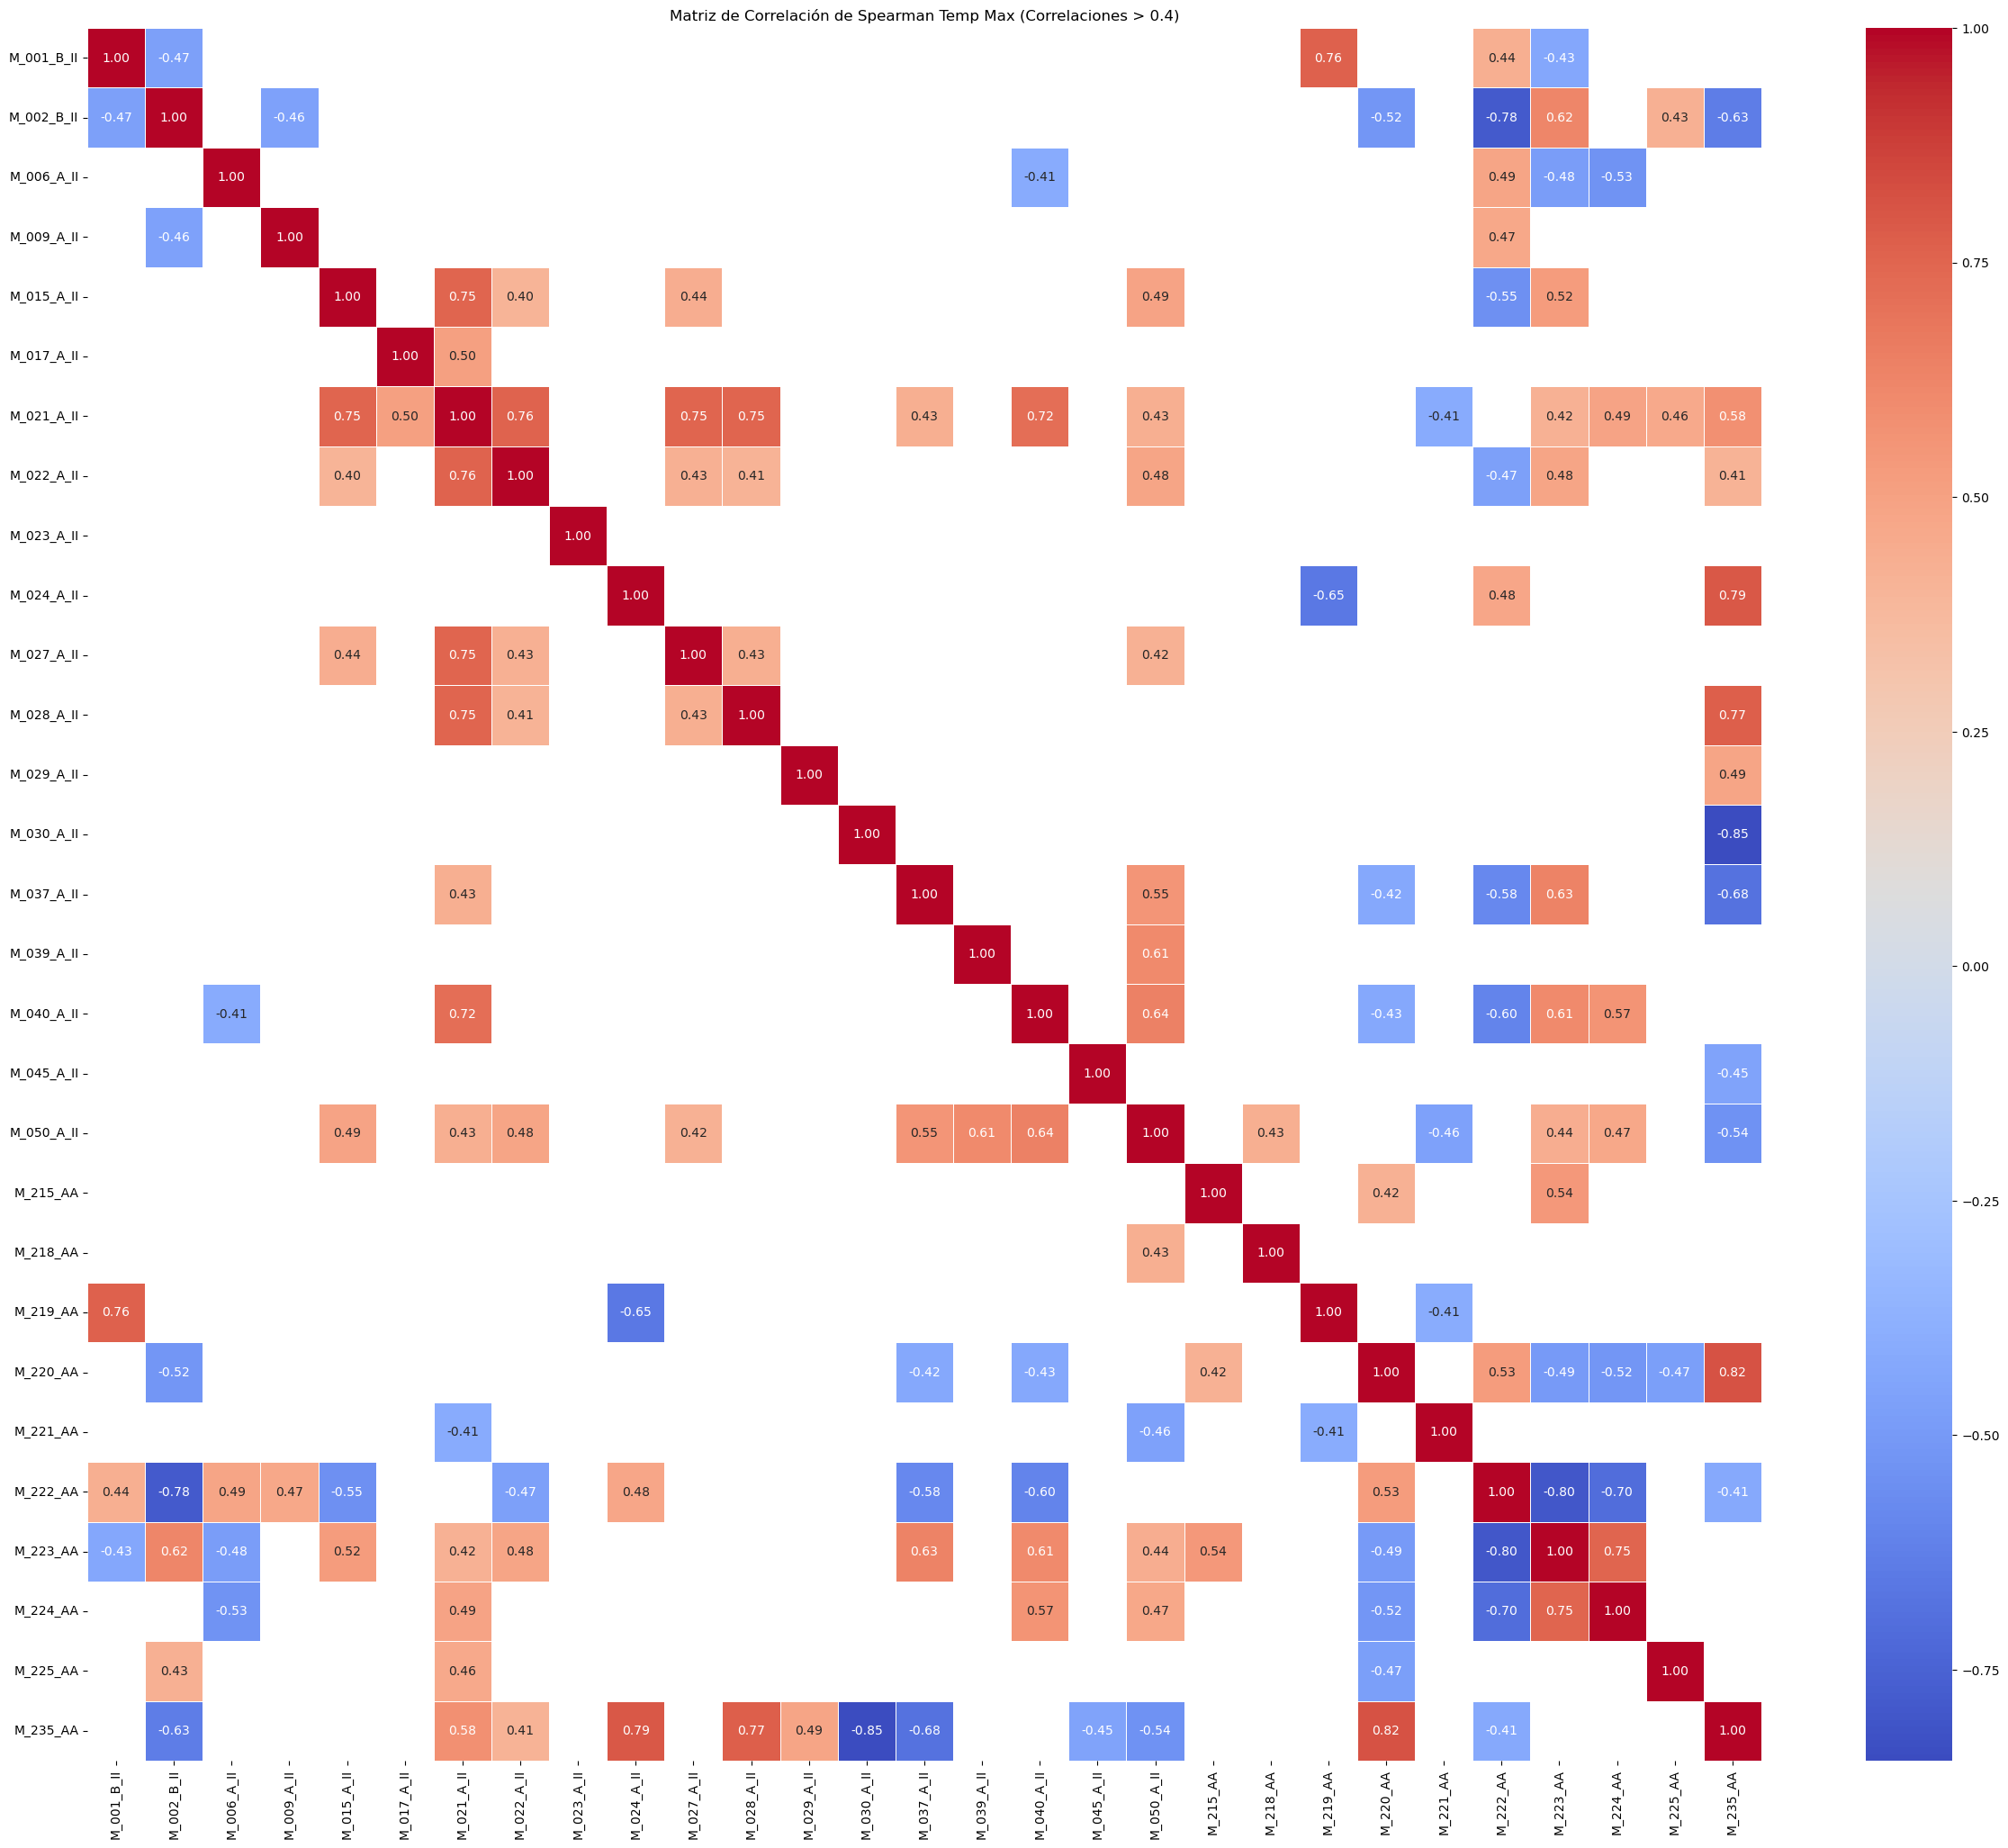

In [4]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

# Filtrar las correlaciones mayores a 0.4
matriz_filtrada = matriz_correlacion[matriz_correlacion.abs() > 0.4]

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_filtrada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Max (Correlaciones > 0.4)")
plt.show()

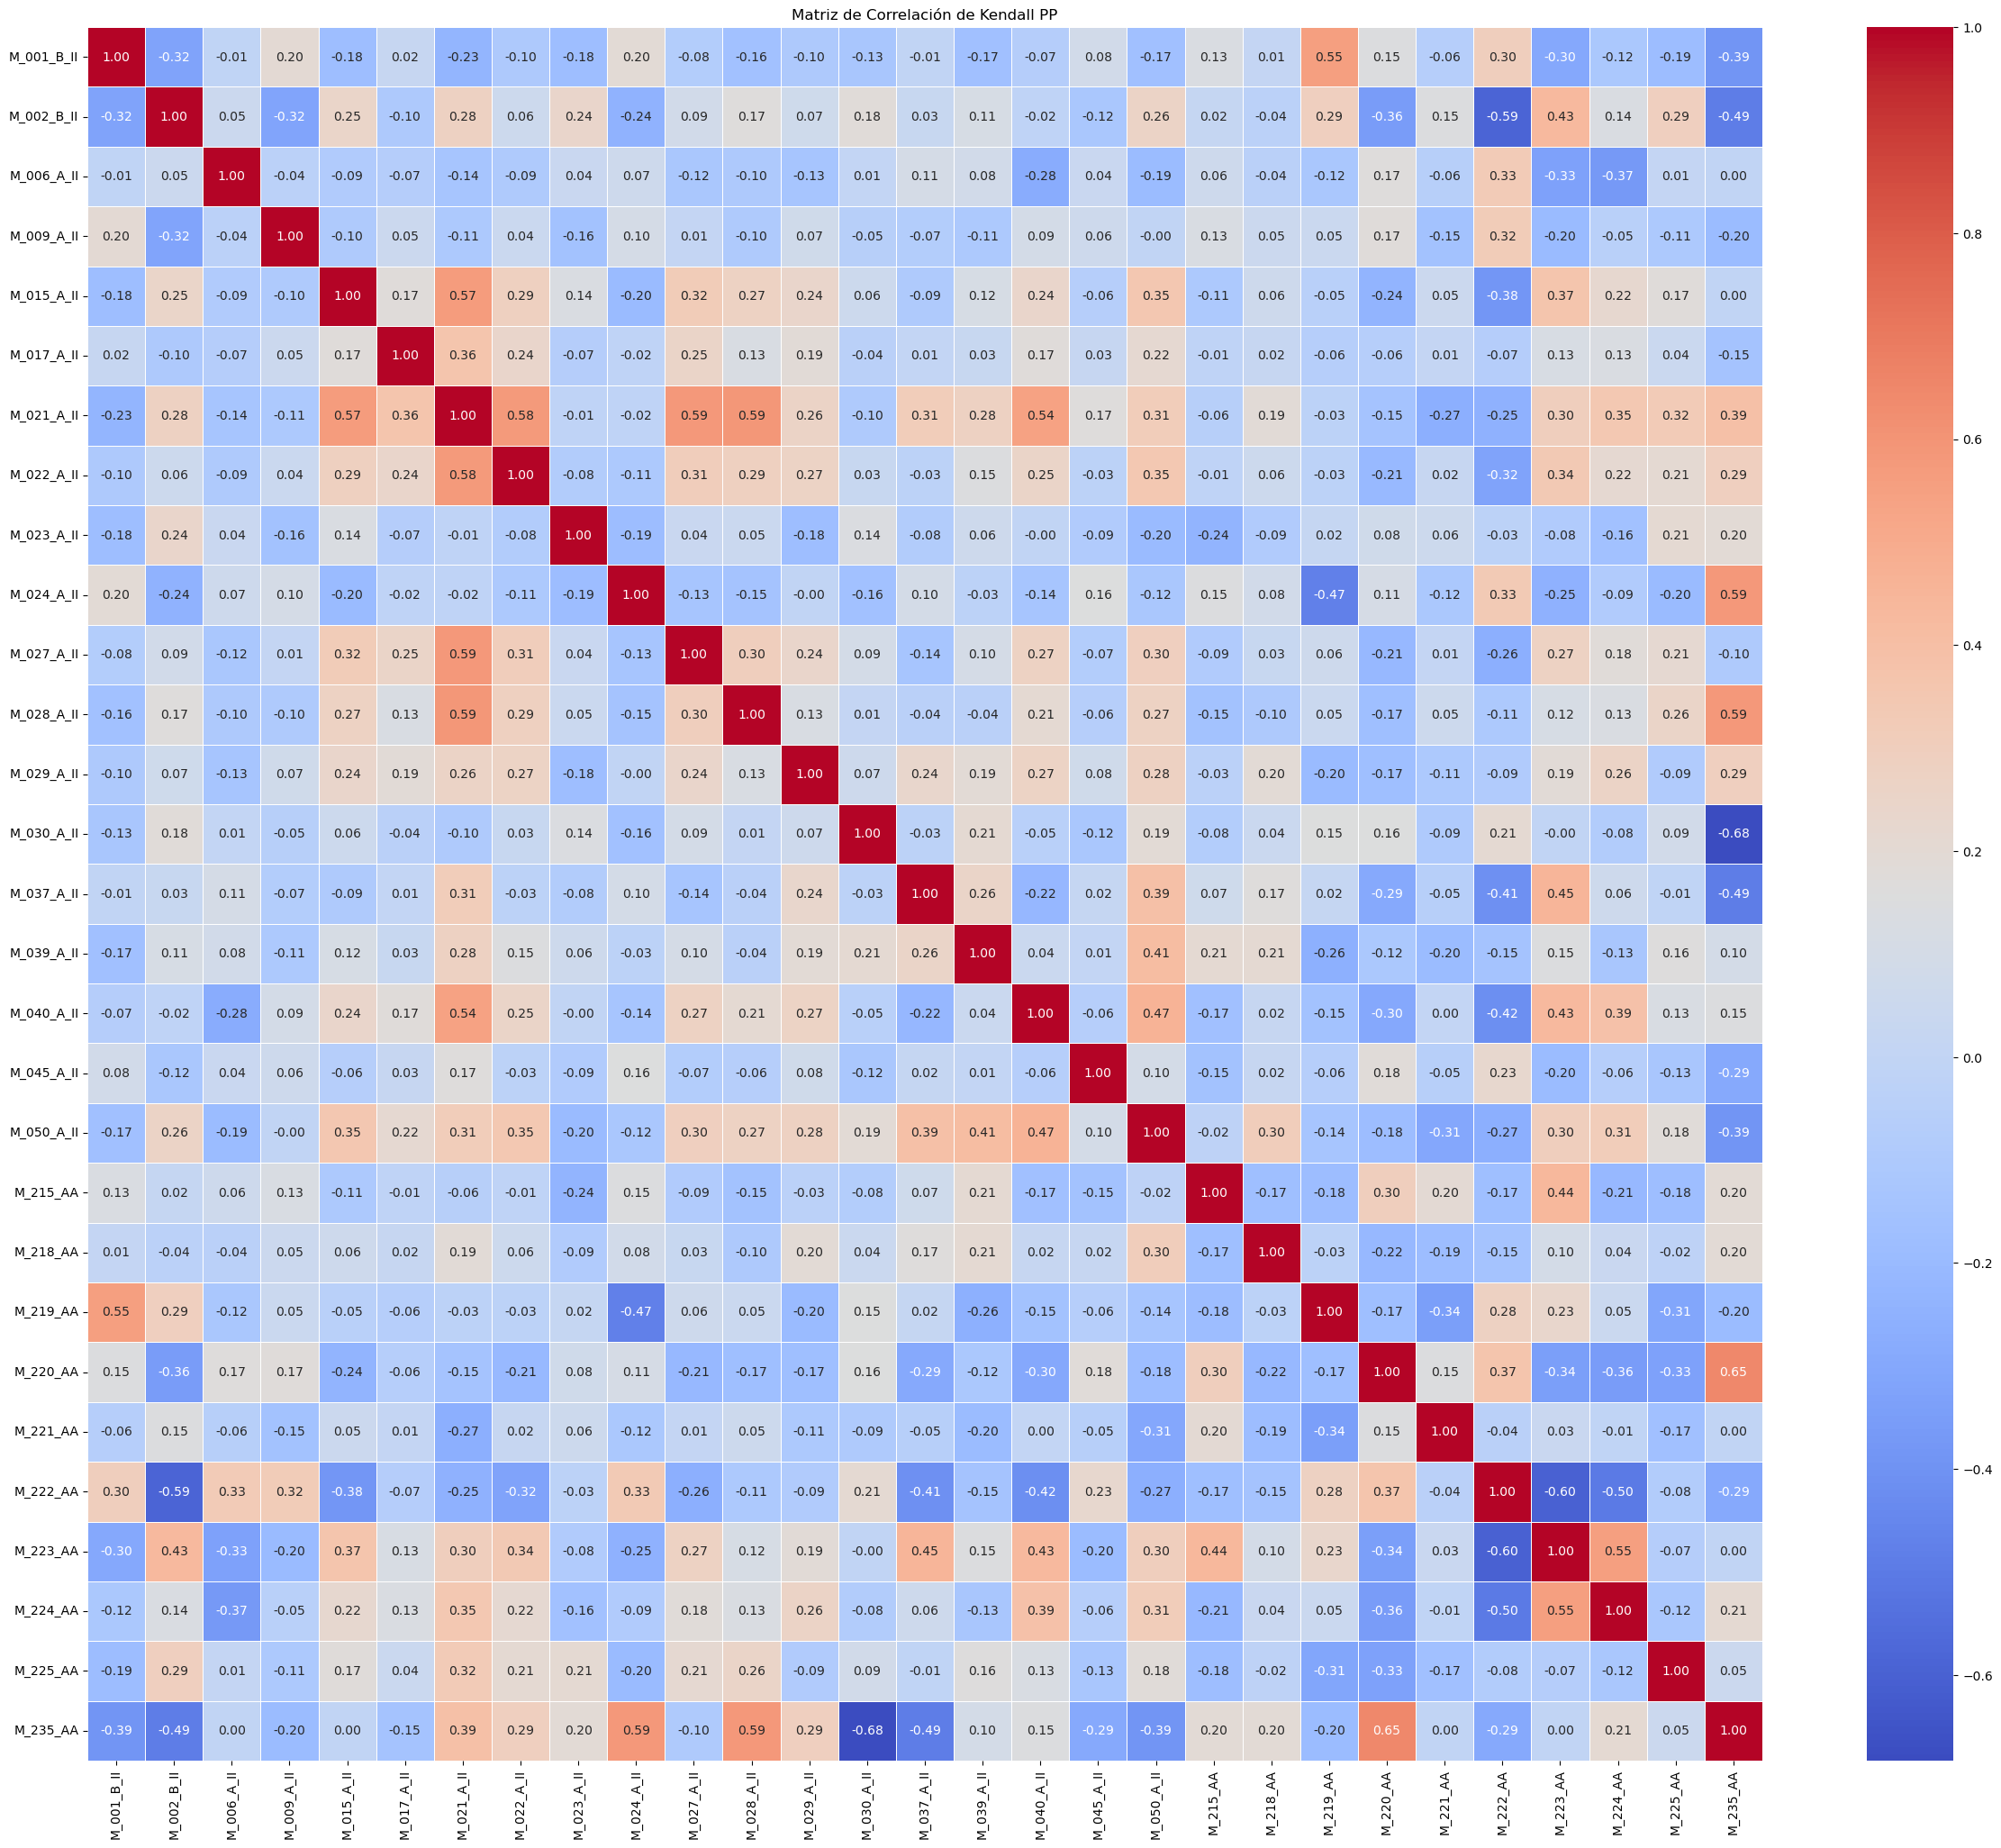

In [4]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Kendall
matriz_correlacion_kendall = datos_numericos.corr(method='kendall')

# Crear el heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Kendall PP")
plt.show()

In [1]:
import pandas as pd
from scipy.stats import spearmanr

archivo_csv = "MatrizTMII.csv"
datos = pd.read_csv(archivo_csv)

# Lista de estaciones específicas
estaciones_especificas = ['M_015_A_II', 'M_017_A_II', 'M_009_A_II', 'M_024_A_II']

# Filtra los datos para las estaciones específicas
datos_especificos = datos[datos['ID_CIDERH'].isin(estaciones_especificas)]

# Pivotar los datos para obtener una matriz de temperaturas mínimas por fecha y estación
matriz_temp_min = datos_especificos.pivot(index='FECHA_RBE', columns='ID_CIDERH', values='TEMP_MAX_RBE')

# Calcular la matriz de correlaciones de Spearman
matriz_correlaciones = matriz_temp_min.corr(method='spearman')

# Mostrar la matriz de correlaciones
print(matriz_correlaciones)

# Visualizar la matriz de correlaciones con un mapa de calor usando seaborn
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones de Spearman para Temperaturas Mínimas')
plt.show()

ID_CIDERH   M_009_A_II  M_015_A_II  M_017_A_II  M_024_A_II
ID_CIDERH                                                 
M_009_A_II    1.000000   -0.016986    0.034344   -0.046034
M_015_A_II   -0.016986    1.000000    0.720623    0.716066
M_017_A_II    0.034344    0.720623    1.000000    0.663123
M_024_A_II   -0.046034    0.716066    0.663123    1.000000


NameError: name 'sns' is not defined

In [1]:
import folium
import pandas as pd

# Lee el archivo CSV con las latitudes y longitudes
data = pd.read_csv('MatrizTMII.csv', encoding='latin-1', low_memory=False)

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[data['LAT_Y'].mean(), data['LON_X'].mean()], zoom_start=10)

# Utiliza un conjunto para realizar un seguimiento de las estaciones ya agregadas
estaciones_agregadas = set()

# Añade marcadores para cada estación meteorológica usando 'ID_CIDERH'
for index, row in data.iterrows():
    # Verifica si la estación ya ha sido agregada
    if row['ID_CIDERH'] not in estaciones_agregadas:
        popup_text = f"ID_CIDERH: {row['ID_CIDERH']}"
        # Añade el marcador con el nombre de la estación
        folium.Marker([row['LAT_Y'], row['LON_X']], popup=popup_text).add_to(mapa)
        # Agrega la estación al conjunto
        estaciones_agregadas.add(row['ID_CIDERH'])

# Guarda el mapa como un archivo HTML
mapa.save('Mapa_Estaciones_II.html')